In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
_URL= 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip= tf.keras.utils.get_file('cats_and_dogs.zip',origin=_URL,extract=True)


In [28]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(PATH,'train')
validation_dir = os.path.join(PATH,'validation')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [29]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_validation = len(os.listdir(validation_cats_dir))
num_dogs_validation = len(os.listdir(validation_dogs_dir))

total_trainset = num_cats_train+num_dogs_train
total_validationset = num_cats_validation+num_dogs_validation

print("Total number of images of cats in training set : ",num_cats_train)
print("Total number of images of dogs in training set : ",num_dogs_train)

print("Total number of images of cat in validation set : ",num_cats_validation)
print("Total number of images of cat in validation set : ",num_dogs_validation)

print("Total number of images in training set : ",total_trainset)
print("Total number of images in validation set : ",total_validationset)


Total number of images of cats in training set :  1000
Total number of images of dogs in training set :  1000
Total number of images of cat in validation set :  500
Total number of images of cat in validation set :  500
Total number of images in training set :  2000
Total number of images in validation set :  1000


In [30]:
batch_size=128
epochs=10
IMG_HEIGHT=150
IMG_WIDTH=150


In [31]:
train_image_generator=ImageDataGenerator(rescale=(1./255))
validation_image_generator=ImageDataGenerator(rescale=(1./255))

In [32]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(IMG_HEIGHT,IMG_WIDTH),class_mode='binary')


Found 2000 images belonging to 2 classes.


In [33]:
validation_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=validation_dir,shuffle=True,target_size=(IMG_HEIGHT,IMG_WIDTH),class_mode='binary')

Found 1000 images belonging to 2 classes.


In [34]:
sample_training_images,_=next(train_data_gen)

In [43]:
def plot_images(images_array):
    """plt.subplots returns : figure and object of axes
        parameters used : row=1, columns=5, and size of each figure(i think)=(20,20)
    """
    fig,axes=plt.subplots(1,5,figsize=(20,20))
    #Return a copy of the array collapsed into one dimension using flatten method
    axes=axes.flatten()
    #Zip function to make tuples of (image,axes)
    for img,ax in zip(images_array,axes):

        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

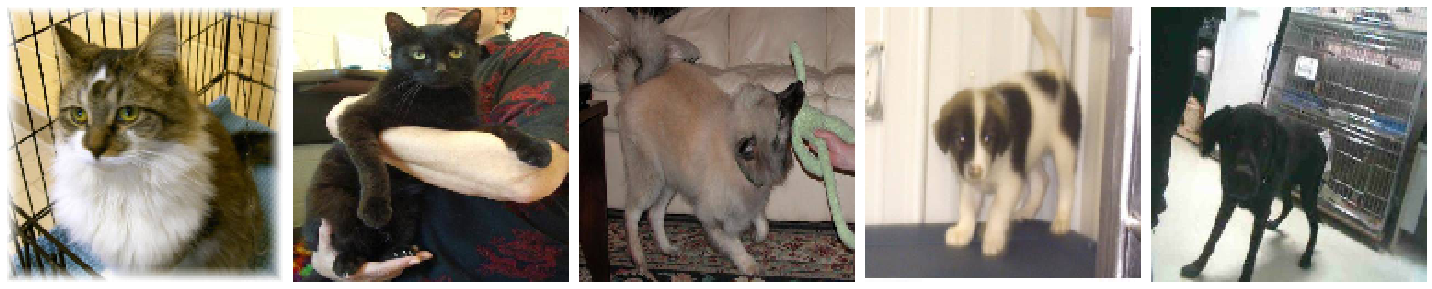

In [44]:
plot_images(sample_training_images[:5])

In [ ]:
model=Sequential([
    Conv2D(16,3,padding='same',activation='relu',input=(IMG_HEIGHT,IMG_WIDTH))
])